In [1]:
#Dependencies
import pandas as pd
import numpy as np
import json
import tweepy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#importing sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
consumer_key = "bfKjnLCPIukl1vPIZhxALm2LX" 
consumer_secret = "rlD1ESfntqFvPkg8XYFXzA0z2AZVGTQIBZ4UKnmwZEMgmRN8pJ"
access_token = "288651824-om6bJgqZ8ULMmqkFs7tpllwDOxQDMVTzCJPOfuER"
access_token_secret = "x6vsy6PvlM2Zi2HO3ZmohmuXuzbq7XNGtu8CqrbVthSCe"


# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
#target users
target_users = ("@cnn","@bbc","@cbs","@nytimes","@foxnews")
counter = 1
sentiments= []
for user in target_users:
    for x in range(5):
        public_tweets = api.user_timeline(target_users, page = x+1)
        for tweet in public_tweets:
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neg,
                           "Neutral": neu,
                           "Tweets Ago": counter,
                              "News Agency":user})
            counter= counter + 1
sentiments_df = pd.DataFrame.from_dict(sentiments)
sentiments_df.head()

        

,Compound,Date,Negative,Neutral,News Agency,Positive,Tweets Ago
0,0.0000,Mon Apr 02 22:47:28 +0000 2018,0.000,1.000,@cnn,0.000,1
1,0.4549,Thu Mar 29 18:13:30 +0000 2018,0.000,0.843,@cnn,0.157,2
2,0.0000,Wed Mar 28 01:07:25 +0000 2018,0.000,1.000,@cnn,0.000,3
3,-0.5106,Mon Mar 26 16:48:46 +0000 2018,0.180,0.820,@cnn,0.000,4
4,-0.2422,Sun Mar 25 08:06:31 +0000 2018,0.166,0.701,@cnn,0.133,5


In [4]:
cnn_sentiments_df= sentiments_df.loc[sentiments_df["News Agency"]=="@cnn"]
cnn_sentiments_df.head()

,Compound,Date,Negative,Neutral,News Agency,Positive,Tweets Ago
0,0.0000,Mon Apr 02 22:47:28 +0000 2018,0.000,1.000,@cnn,0.000,1
1,0.4549,Thu Mar 29 18:13:30 +0000 2018,0.000,0.843,@cnn,0.157,2
2,0.0000,Wed Mar 28 01:07:25 +0000 2018,0.000,1.000,@cnn,0.000,3
3,-0.5106,Mon Mar 26 16:48:46 +0000 2018,0.180,0.820,@cnn,0.000,4
4,-0.2422,Sun Mar 25 08:06:31 +0000 2018,0.166,0.701,@cnn,0.133,5


In [5]:
bbc_sentiments_df= sentiments_df.loc[sentiments_df["News Agency"]=="@bbc"]
bbc_sentiments_df["Tweets Ago"] = bbc_sentiments_df["Tweets Ago"] - 65
bbc_sentiments_df.head()

C:\Users\Zachk\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Compound,Date,Negative,Neutral,News Agency,Positive,Tweets Ago
65,0.0000,Mon Apr 02 22:47:28 +0000 2018,0.000,1.000,@bbc,0.000,1
66,0.4549,Thu Mar 29 18:13:30 +0000 2018,0.000,0.843,@bbc,0.157,2
67,0.0000,Wed Mar 28 01:07:25 +0000 2018,0.000,1.000,@bbc,0.000,3
68,-0.5106,Mon Mar 26 16:48:46 +0000 2018,0.180,0.820,@bbc,0.000,4
69,-0.2422,Sun Mar 25 08:06:31 +0000 2018,0.166,0.701,@bbc,0.133,5


In [6]:
cbs_sentiments_df= sentiments_df.loc[sentiments_df["News Agency"]=="@cbs"]
cbs_sentiments_df["Tweets Ago"] = cbs_sentiments_df["Tweets Ago"] -130
cbs_sentiments_df.head()

C:\Users\Zachk\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Compound,Date,Negative,Neutral,News Agency,Positive,Tweets Ago
130,0.0000,Mon Apr 02 22:47:28 +0000 2018,0.000,1.000,@cbs,0.000,1
131,0.4549,Thu Mar 29 18:13:30 +0000 2018,0.000,0.843,@cbs,0.157,2
132,0.0000,Wed Mar 28 01:07:25 +0000 2018,0.000,1.000,@cbs,0.000,3
133,-0.5106,Mon Mar 26 16:48:46 +0000 2018,0.180,0.820,@cbs,0.000,4
134,-0.2422,Sun Mar 25 08:06:31 +0000 2018,0.166,0.701,@cbs,0.133,5


In [7]:
nytimes_sentiments_df= sentiments_df.loc[sentiments_df["News Agency"]=="@nytimes"]
nytimes_sentiments_df["Tweets Ago"] = nytimes_sentiments_df["Tweets Ago"] -195
nytimes_sentiments_df.head()

C:\Users\Zachk\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Compound,Date,Negative,Neutral,News Agency,Positive,Tweets Ago
195,0.0000,Mon Apr 02 22:47:28 +0000 2018,0.000,1.000,@nytimes,0.000,1
196,0.4549,Thu Mar 29 18:13:30 +0000 2018,0.000,0.843,@nytimes,0.157,2
197,0.0000,Wed Mar 28 01:07:25 +0000 2018,0.000,1.000,@nytimes,0.000,3
198,-0.5106,Mon Mar 26 16:48:46 +0000 2018,0.180,0.820,@nytimes,0.000,4
199,-0.2422,Sun Mar 25 08:06:31 +0000 2018,0.166,0.701,@nytimes,0.133,5


In [8]:
fox_sentiments_df= sentiments_df.loc[sentiments_df["News Agency"]=="@foxnews"]
fox_sentiments_df["Tweets Ago"] = fox_sentiments_df["Tweets Ago"] - 260
fox_sentiments_df.head()

C:\Users\Zachk\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Compound,Date,Negative,Neutral,News Agency,Positive,Tweets Ago
260,0.0000,Mon Apr 02 22:47:28 +0000 2018,0.000,1.000,@foxnews,0.000,1
261,0.4549,Thu Mar 29 18:13:30 +0000 2018,0.000,0.843,@foxnews,0.157,2
262,0.0000,Wed Mar 28 01:07:25 +0000 2018,0.000,1.000,@foxnews,0.000,3
263,-0.5106,Mon Mar 26 16:48:46 +0000 2018,0.180,0.820,@foxnews,0.000,4
264,-0.2422,Sun Mar 25 08:06:31 +0000 2018,0.166,0.701,@foxnews,0.133,5


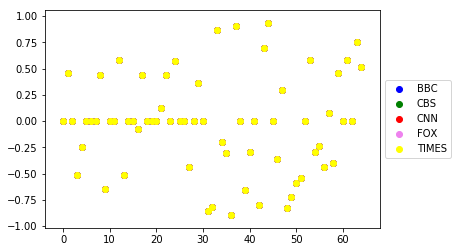

In [12]:
import numpy as np
plt.scatter(np.arange(len(bbc_sentiments_df["Tweets Ago"])),bbc_sentiments_df["Compound"],color = "blue",label = "BBC")
plt.scatter(np.arange(len(cbs_sentiments_df["Tweets Ago"])),cbs_sentiments_df["Compound"],color = "green",label = "CBS")
plt.scatter(np.arange(len(cnn_sentiments_df["Tweets Ago"])),cnn_sentiments_df["Compound"],color = "red",label = "CNN")
plt.scatter(np.arange(len(fox_sentiments_df["Tweets Ago"])),fox_sentiments_df["Compound"],color = "violet", label = "FOX")
plt.scatter(np.arange(len(nytimes_sentiments_df["Tweets Ago"])),nytimes_sentiments_df["Compound"],color = "yellow", label ="TIMES")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

plt.bar(x=cnn_sentiments_df["Compound"].mean,color="red",edgecolor="black",width=1)
plt.bar(x=cbs_sentiments_df["Compound"].mean,color="blue",edgecolor="black",width=1)
plt.bar(x=bbc_sentiments_df["Compound"].mean,color="green",edgecolor="black",width=1)
plt.bar(x=fox_sentiments_df["Compound"].mean,color="lightblue",edgecolor="black",width=1)
plt.bar(x=nytimes_sentiments_df["Compound"].mean,color="yellow",edgecolor="black",width=1)